In [9]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,validation_curve,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv("../dataset/data.csv")
dataset

,Body Size,Body Weight,Height,Bone Structure,Com1lexion,General feel of skin,Texture of Skin,Hair Color,A11earance of Hair,Sha1e of face,...,Eyelashes,Blinking of Eyes,Cheeks,Nose,Teeth and gums,Li1s,Nails,A11etite,Liking tastes,Dosha
0,1,1,1,2,2,0,0,0,1,0,...,1,1,0,2,2,0,2,2,0,3
1,1,1,0,1,1,0,2,1,0,0,...,1,1,1,2,1,0,0,2,0,3
2,0,1,1,1,1,1,2,0,0,0,...,1,1,1,2,1,1,1,2,0,1
3,0,1,0,0,1,0,2,0,1,2,...,0,1,1,0,1,1,0,2,0,3
4,2,1,0,1,0,1,2,0,0,0,...,0,1,0,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,2,0,0,0,...,1,1,0,2,1,1,0,2,0,3
1196,1,1,2,1,1,1,2,0,0,0,...,1,1,1,0,1,1,0,1,0,3
1197,0,0,1,0,1,1,2,0,2,1,...,1,0,0,0,0,1,1,0,0,3
1198,2,2,1,2,1,1,2,0,1,2,...,1,1,2,2,1,1,0,2,0,4


In [11]:
X=dataset.iloc[:,:-1].values
X

array([[1, 1, 1, ..., 2, 2, 0],
       [1, 1, 0, ..., 0, 2, 0],
       [0, 1, 1, ..., 1, 2, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [2, 2, 1, ..., 0, 2, 0],
       [2, 1, 2, ..., 0, 0, 0]], dtype=int64)

In [12]:
Y=dataset.iloc[:,20].values
Y

array([3, 3, 1, ..., 3, 4, 3], dtype=int64)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [14]:
X_train

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 2, 0, 0],
       [2, 1, 2, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 2, 0],
       [0, 0, 1, ..., 1, 2, 2]], dtype=int64)

In [15]:
y_train

array([3, 3, 1, 2, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 5, 3, 4, 3, 1, 3, 3,
       3, 0, 2, 3, 0, 3, 1, 0, 3, 3, 5, 3, 1, 2, 1, 3, 1, 3, 3, 1, 0, 0,
       5, 3, 3, 3, 1, 0, 1, 3, 3, 0, 3, 1, 3, 3, 3, 5, 3, 3, 0, 1, 3, 3,
       3, 3, 0, 0, 2, 3, 1, 3, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 4, 3, 3, 0,
       3, 3, 1, 3, 3, 3, 4, 1, 3, 5, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 3, 0, 3, 3, 3, 2, 3,
       2, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 2, 0, 3, 1, 0, 3, 3,
       0, 0, 4, 3, 3, 3, 3, 5, 2, 3, 1, 3, 0, 0, 0, 0, 3, 0, 5, 3, 3, 3,
       3, 4, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3,
       0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 2, 4, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 0, 3, 5, 3, 0, 3, 3, 3, 3, 3, 5, 3, 3, 1, 1, 3, 3, 5, 0, 3, 3,
       3, 0, 0, 3, 3, 3, 2, 0, 5, 3, 5, 0, 3, 2, 1, 1, 3, 2, 3, 3, 3, 3,
       5, 0, 3, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 4, 3,

In [16]:
NB=GaussianNB()

In [17]:
NB.fit(X_train,y_train)

GaussianNB()

In [18]:
print(NB.score(X_train,y_train),NB.score(X_test,y_test))

0.7083333333333334 0.7138888888888889


In [19]:
y_pred=NB.predict(X_test)

In [20]:
y_pred

array([1, 1, 1, 1, 5, 1, 3, 0, 2, 3, 1, 4, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1,
       0, 4, 1, 3, 3, 1, 5, 4, 3, 1, 1, 4, 3, 1, 4, 1, 3, 0, 1, 5, 1, 3,
       2, 0, 3, 3, 1, 1, 3, 3, 3, 5, 0, 5, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1,
       3, 3, 1, 3, 4, 3, 0, 3, 1, 0, 2, 0, 0, 2, 5, 0, 4, 3, 1, 0, 3, 0,
       3, 0, 3, 0, 1, 1, 5, 1, 3, 1, 1, 3, 0, 3, 3, 1, 1, 1, 1, 1, 1, 0,
       3, 3, 0, 0, 3, 3, 4, 5, 3, 1, 3, 1, 1, 0, 3, 1, 4, 0, 1, 0, 0, 0,
       1, 3, 0, 3, 1, 1, 3, 4, 0, 3, 1, 0, 3, 5, 2, 1, 0, 1, 1, 2, 0, 1,
       3, 3, 0, 3, 1, 1, 1, 4, 5, 1, 3, 0, 1, 1, 0, 0, 3, 3, 0, 4, 1, 3,
       1, 0, 3, 1, 5, 3, 1, 1, 1, 0, 0, 3, 0, 1, 0, 1, 3, 0, 3, 4, 1, 1,
       1, 0, 1, 5, 0, 0, 3, 1, 3, 2, 3, 0, 3, 3, 0, 4, 3, 1, 0, 0, 0, 5,
       0, 3, 1, 2, 1, 0, 1, 3, 0, 1, 3, 0, 2, 4, 0, 0, 3, 0, 1, 0, 0, 1,
       0, 1, 3, 1, 0, 1, 5, 2, 1, 0, 5, 1, 2, 2, 5, 2, 1, 0, 1, 0, 3, 2,
       3, 0, 3, 0, 2, 1, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 1, 3, 1, 5, 1, 3,
       3, 1, 3, 0, 0, 3, 3, 1, 1, 3, 1, 4, 1, 2, 3,

In [21]:
target=["vata","pitta","kapha","vata+pitta","vata+kapha","pitta+kapha"]

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[62,  0,  0, 12,  0,  0],
       [ 0, 45,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0],
       [23, 65,  0, 92,  0,  3],
       [ 0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0, 16]], dtype=int64)

[]

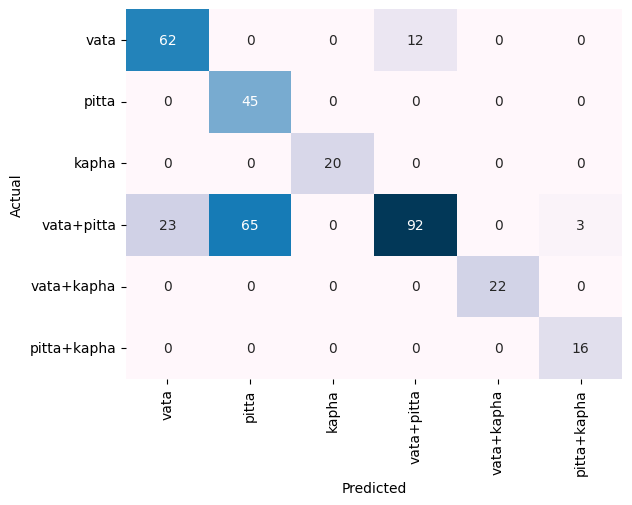

In [32]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',xticklabels=target,yticklabels=target,cbar=False,cmap='PuBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()

In [25]:
print(recall_score(y_test,y_pred,average="weighted"))

0.7138888888888889


In [26]:
print(precision_score(y_test,y_pred,average="weighted"))

0.8048440585901886


In [27]:
print(f1_score(y_test,y_pred,average="weighted"))

0.7160898258955056


In [28]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        74
           1       0.41      1.00      0.58        45
           2       1.00      1.00      1.00        20
           3       0.88      0.50      0.64       183
           4       1.00      1.00      1.00        22
           5       0.84      1.00      0.91        16

    accuracy                           0.71       360
   macro avg       0.81      0.89      0.82       360
weighted avg       0.80      0.71      0.72       360



In [29]:
accuracy_score(y_test,y_pred)

0.7138888888888889